In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utilities import latex_text_width_1col, colors
from hazma.scalar_mediator import HiggsPortal, HeavyQuark

**Plots spectra for annihilation into mediators in the scalar model.**

In [2]:
# Dark matter masses
mxs = np.array([100.0, 200.0, 300.0, 400.0])
# Mediator masses
mss = np.array([1.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0])
# List of models. The top row of the plot will contain the Higgs portal model
# spectra, the bottom the heavy quark model spectra.
sms = [
    HiggsPortal(1.0, 1.0, gsxx=1.0, stheta=1e-1),
    HeavyQuark(1.0, 1.0, gsxx=1.0, gsQ=1e-1, mQ=1e3, QQ=1.0),
]

# Approximate Milky Way velocity dispersion, used to compute the DM
# center of mass energy
vx_mw = 1e-3

# Photon energies
e_gam_min, e_gam_max = 5.0, 600.0
e_gams = np.geomspace(e_gam_min, e_gam_max, 250)

# Plot dimensions
n_subplot_rows, n_subplot_cols = len(sms), len(mxs)


# Color map for mediator masses
def cmap(ms):
    return colors[np.where(mss == ms)[0][0]]


# Label positions for mediator masses
ms_labels = np.array(
    [
        [
            {1: (1.1e2, 5e-2), 50: (1.3e1, 3e-3), 100: (6e0, 1e-2)},
            {150: (2.5e1, 4.2e-3), 200: (1.2e1, 1.2e-4)},
            {250: (7e0, 1.15e-4), 300: (5.5e0, 4e-2)},
            {400: (2.5e1, 4.2e-2)},
        ],
        [{}, {}, {}, {}],
    ]
)

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/decay.py:141: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.Spectrum(photon_energies, pion_energy, mode)
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/scalar_mediator/_scalar_mediator_spectra.py:98: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 2.0 * dnde_decay_s(e_gams, e_s, ms, pw_array, fs)
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/scalar_mediator/_scalar_mediator_spectra.py:98: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return 2.0 * dnde_decay_s(e_gams, e_s, ms, pw_array, fs)
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/scalar_mediator/_scalar_mediator_spectra.py:98: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields n

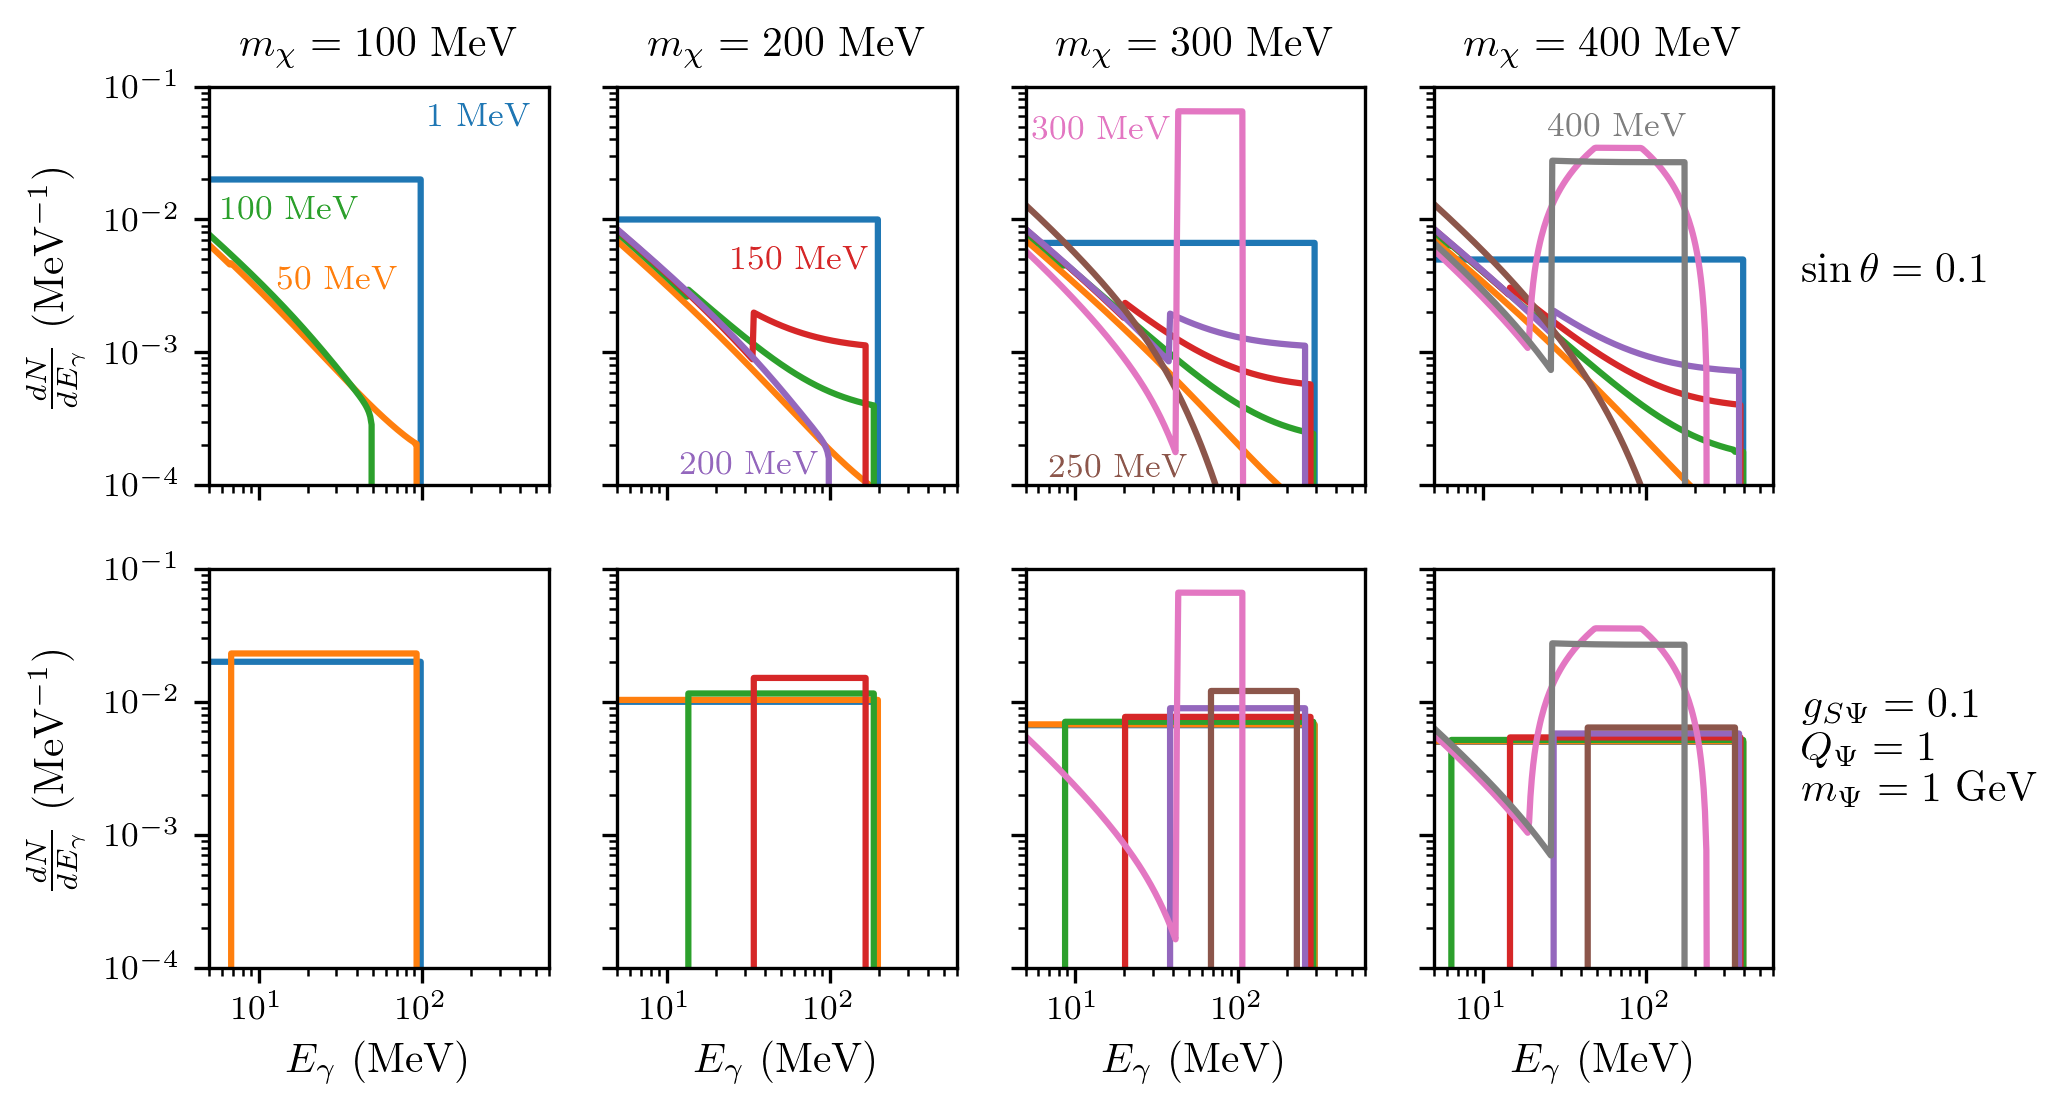

In [3]:
fig, axes = plt.subplots(
    n_subplot_rows,
    n_subplot_cols,
    sharex=True,
    sharey=True,
    figsize=(latex_text_width_1col, 0.55 * latex_text_width_1col),
)

for row in range(n_subplot_rows):  # loop over type of model
    for col in range(n_subplot_cols):  # loop over DM masses
        ax = axes[row, col]

        # Get the model and set DM mass to column's value
        sm = sms[row]
        sm.mx = mxs[col]
        # DM center of mass energy
        e_cm = 2.0 * sm.mx * (1.0 + 0.5 * vx_mw ** 2)

        # Loop over mediator masses
        for ms in mss:
            if ms <= e_cm / 2:
                sm.ms = ms
                # Compute spectrum for annihilation to mediators
                ax.loglog(e_gams, sm.spectra(e_gams, e_cm)["s s"], color=cmap(sm.ms))

        # Formatting: label mediator masses
        for ms, (x, y) in ms_labels[row, col].items():
            ax.text(x, y, r"%i MeV" % ms, fontsize=8, color=cmap(ms))

# Formatting
for row in range(n_subplot_rows):
    axes[row, 0].set_ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
    axes[row, 0].set_ylim(1e-4, 1e-1)

for col in range(n_subplot_cols):
    axes[0, col].set_title(r"$m_\chi = %i$ MeV" % mxs[col], fontsize=10)
    axes[-1, col].set_xlabel(r"$E_\gamma$ (MeV)")
    axes[-1, col].set_xlim(e_gam_min, e_gam_max)

axes[0, -1].text(900, 4e-3, r"$\sin\theta = 0.1$", va="center", fontsize=10)
axes[1, -1].text(
    900,
    4e-3,
    r"$g_{S\Psi} = 0.1$" + "\n" + r"$Q_\Psi = 1$" + "\n" + r"$m_\Psi = 1$ GeV",
    va="center",
    fontsize=10,
)

fig.tight_layout()
fig.savefig("figures/scalar_spectra_ann_to_med.pdf", bbox_inches="tight")
plt.show()